# En este ejercicio vamos a poner en práctica la regresión logística. Carga el dataset California housing y define una nueva variable: oceano que tomará el valor 1 si la variable ocean_proximity es: <1H OCEAN o NEAR OCEAN, y 0 en cualquier otro caso (INLAND, ISLAND o NEAR BAY). Una vez creada esta variable:

In [27]:
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from tabulate import tabulate

import os
import tarfile
import urllib.request
import pandas as pd

In [2]:
# definir las rutas y caminos donde se encuentran los datos------
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# path que se va a crear en nuestro sistema----------------------
HOUSING_PATH = os.path.join("datasets", "housing")
# lugar de descarga del dataset----------------------------------
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
# definir una funcion que obtenga los datos y los descargue-----
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [4]:
# definir una funcion que obtenga los datos y los descargue-----
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [5]:
# definir una funcion que cargue el csv en un dataframe----------
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## a) Ajusta un modelo de regresión logística con el precio de la casa como predictor de esta variable binomial que has creado (oceano).

In [10]:
housing['oceano'] = [
    1 if x == '<1H OCEAN' else
    1 if x == 'NEAR OCEAN' else
    0 for x in housing['ocean_proximity']]
# comprobacion de la variable oceano-----------------------------
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  oceano              20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB
None


In [11]:
print(housing["oceano"].value_counts())

1    11794
0     8846
Name: oceano, dtype: int64


En este caso, se va a definir como variable respuesta la variable que acabamos de crear
oceano. Ahora se define el modelo de regresión logística en el que utilizaremos como
variable predictora a la variable median_house_value. Para ello emplearemos una clase
de tipo LogisticRegression de la librería sklearn. Además, la variable predictora se va a
estandarizar. En el caso de la regresión simple no es necesario, pero se estandariza para
que el coeficiente obtenido sea comparable con el obtenido en la regresión múltiple
del ejercicio 2.

In [12]:
# importar clase-------------------------------------------------
from sklearn.linear_model import LogisticRegression
# importar estandarizador-.--------------------------------------
from sklearn.preprocessing import StandardScaler
#definir variable respuesta
x = housing["median_house_value"].values.reshape(-1,1)
# estandarizamos x-----------------------------------------------
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [13]:
x_prepared = scaler.transform(x)
# separar variable respuesta del dataset-------------------------
y = housing["oceano"].values.reshape(-1,1).ravel()
# ajustar el modelo----------------------------------------------
logistic_reg = LogisticRegression()
logistic_reg.fit(x_prepared, y)
# obtener coeficientes del modelo--------------------------------
# intercepto

LogisticRegression()

In [14]:
print("El intercepto es = %.3f" % logistic_reg.intercept_)
# coeficientes de regresion

El intercepto es = 0.377


In [15]:
print("El coeficiente es = %.3f" % logistic_reg.coef_)

El coeficiente es = 0.895


El coeficiente es positivo, lo que indica que el precio de las casas está asociado con ser
de la categoría 1 para la variable oceano.

## b) Si una nueva casa costase 250000$, ¿en qué categoría de la variable oceano la clasificarías?

Se predice para una nueva casa con un valor de 250000 dólares. El primer paso es
transformar este valor en su medida estandarizada.

In [16]:
# predecir clase-------------------------------------------------
x_nueva = [[250000]]
# estandarizamos la observacion
x_nueva_prepared = scaler.transform(x_nueva)
# predecir nueva casa--------------------------------------------
clase_predicha = logistic_reg.predict(x_nueva_prepared)
print(clase_predicha)

[1]


Para la casa con un valor de 250000 dólares se obtiene que la clase predicha es 1, es
decir, que es más probable según el modelo de regresión logística que oceano sea 1. En
concreto, se puede obtener esa probabilidad con la función logistic_reg.predict_proba().

In [19]:
# calcular probabilidad------------------------------------------
clase_predicha_prob =logistic_reg.predict_proba(x_nueva_prepared)
# sacar por pantalla las probabilidades de 0 y de 1--------------
print("Pr(oceano = 0|median_housing_value = 250000) = %.4f" % clase_predicha_prob[0,0],",", "\nPr(oceano = 1|median_housing_value = 250000) = %.4f" % clase_predicha_prob[0,1],".")

Pr(oceano = 0|median_housing_value = 250000) = 0.3294 , 
Pr(oceano = 1|median_housing_value = 250000) = 0.6706 .


Aplicando la función predict_proba(), se observa que la probabilidad de que la clase
obtenida sea 1 es del 67 %.

# A partir del conjunto de datos empleado en el ejercicio 1:

## a) Ajusta un modelo de regresión logística múltiple con todas las variables de California housing excepto ocean_proximity, longitude y latitude, como predictores de la variable oceano.

Ahora, debemos construir la matriz de diseño eliminando la variable ocean_proximity para poder realizar la regresión lineal múltiple.

In [22]:
# CONSTRUIR MATRIZ X---------------------------------------------
# quitar variable ocean_proximity--------------------------------
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num = housing_num.drop("oceano", axis=1)
housing_num = housing_num.drop("longitude", axis=1)
housing_num = housing_num.drop("latitude", axis=1)
# importar el "imputador"----------------------------------------
from sklearn.impute import SimpleImputer
# importar el "estandarizador"-----------------------------------
from sklearn.preprocessing import StandardScaler
# importar la clase pipeline"------------------------------------
from sklearn.pipeline import Pipeline
# definir el pipeline--------------------------------------------
num_pipeline = Pipeline([
        ("imputador", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])
# aplicar el pipeline--------------------------------------------
housing_num_tr = num_pipeline.fit_transform(housing_num)
# importar clases------------------------------------------------
from sklearn.compose import ColumnTransformer
# atributos de las variables numericas---------------------------
num_attribs = list(housing_num)
# definir full pipeline------------------------------------------
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])
housing_prepared = full_pipeline.fit_transform(housing_num)
# definir matriz X
X = housing_prepared
# separar variable respuesta del dataset-------------------------
y = housing["oceano"].values.reshape(-1,1).ravel()
# ajustar el modelo----------------------------------------------
logistic_reg_m = LogisticRegression()
logistic_reg_m.fit(X, y)
# obtener coeficientes del modelo--------------------------------
# intercepto

LogisticRegression()

In [24]:
print("El intercepto es", logistic_reg_m.intercept_)
# coeficientes de regresion
# print("Los coeficientes de las variables:",
# list(housing_num.columns.values.tolist()) ,"son:",
# logistic_reg_m.coef_)
# podemos poner en una tabla estos valores-----------------------
# poner nombres de las variables en una lista--------------------

El intercepto es [0.40640537]


In [28]:
variables = housing_num.columns.values.tolist()
# poner los coeficientes en otra lista---------------------------
coefs = logistic_reg_m.coef_.tolist()[0]
# definir las filas de la tabla----------------------------------
table = zip(variables, coefs)
# imprimir las tablas con nombres de las columnas (headers)------
print(tabulate(table, headers = ["Variable", "Coeficiente"]))

Variable              Coeficiente
------------------  -------------
housing_median_age     -0.0732381
total_rooms            -2.01059
total_bedrooms          0.167547
population              1.37391
households              0.472922
median_income           0.0478714
median_house_value      1.17594


## b) Que probabilidad tendría una casa de con las siguientes características de ser oceano.

- housing_median_age: 35 años
- total_rooms: 5000
- total_bedrooms: 1200
- population: 100000
- households: 1000
- median_income: 10 ( decenas de miles de dólares)
- median_house_value: 250000 dólares

Una vez que se ha obtenido el modelo de regresión logística múltiple, se pasa a
predecir la clase de oceano de la nueva casa. Para ello, se debe estandarizar dicha
observación.

In [29]:
# obtener observacion--------------------------------------------
housing_new = pd.DataFrame(np.array([[35, 2000, 1000, 1200, 900,
10, 250000]]), columns = variables)
# estandarizar---------------------------------------------------
scaler2 = StandardScaler()
scaler2.fit(housing_num)

StandardScaler()

In [30]:
housing_new_prepared = scaler2.transform(housing_new)
# valor estandarizado--------------------------------------------
print(housing_new_prepared)

[[ 0.50539419 -0.29142558  1.09671839 -0.19910795  1.04744666  3.22634352
   0.37388967]]


Se introduce la observación estandarizada en el modelo de regresión logística múltiple.

In [31]:
# predecir clase------------------------------------------
clase_predicha=logistic_reg_m.predict(housing_new_prepared)
print(clase_predicha)

[1]


Para esta casa se sigue obteniendo un valor predicho de 1, es decir, que es más probable
según el modelo de regresión logística múltiple que oceano sea 1. En concreto, se
puede obtener esa probabilidad con la función logistic_reg.predict_proba().

In [32]:
# calcular probabilidad------------------------------------------
clase_predicha_prob=logistic_reg_m.predict_proba(housing_new_prepared)
# sacar por pantalla las probabilidades de 0 y de 1--------------
print("Pr(oceano=0|housing_new)= %.4f" % clase_predicha_prob[0,0],
",","\nPr(oceano=1|housing_new)= %.4f" % clase_predicha_prob[0,1],
".")

Pr(oceano=0|housing_new)= 0.1240 , 
Pr(oceano=1|housing_new)= 0.8760 .


Al añadir más variables a la predicción, la nueva observación ha aumentado su proba-
bilidad de ser del tipo 1. Se observa que con el modelo de regresión logística múltiple
tiene una probabilidad de ser de clase 1, obtenida con la función predict_proba(), del
87.6 %.

# Partiendo del conjunto de datos utilizado en los ejercicios 1 y 2, realiza:

- Un modelo de KNN con K = 10 para clasificar la variable oceano a partir de las variables predictoras median_house_value y total_rooms. Representa gráficamente las regiones obtenidas.
- ¿Qué sucede si utilizamos K = 1? ¿Y si utilizamos K = 100?
- ¿Cuál sería el valor de K óptimo?

## Un modelo de KNN con K = 10 para clasificar la variable oceano a partir de las variables predictoras median_house_value y total_rooms. Representa gráficamente las regiones obtenidas.

En este problema se trata de obtener un modelo que permita clasificar la variable
oceano a través de las variables predictoras X 1 = median_house_value y X 2 =
total_rooms. El valor real de la variablre respuesta se muestra en la Figura 7.

In [34]:
#seleccionar predictores-----------------------------------------
predictores = housing_num[["median_house_value",
"total_rooms"]]
# pegar la clase a la base con los predictores estandarizados----
puntos = predictores.copy()
puntos["oceano"] = housing[["oceano"]]
puntos["oceano"] = puntos["oceano"].astype(object)
puntos.head()

,median_house_value,total_rooms,oceano
0,452600.0,880.0,0
1,358500.0,7099.0,0
2,352100.0,1467.0,0
3,341300.0,1274.0,0
4,342200.0,1627.0,0


In [35]:
puntos.info()
# pintar la clase------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   oceano              20640 non-null  object 
dtypes: float64(2), object(1)
memory usage: 483.9+ KB


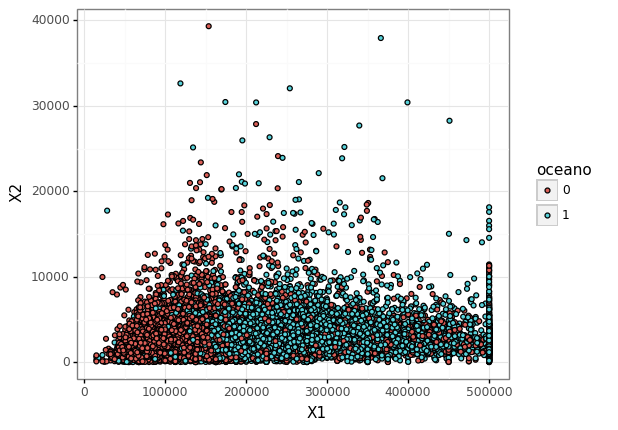

<ggplot: (8743665418590)>

In [36]:
(
ggplot(puntos, aes(x = "median_house_value",
y = "total_rooms", fill = "oceano")) +
geom_point() +
ylab("X2") +
xlab("X1") +
theme_bw() +
theme(legend_position = "right",
subplots_adjust={'right': 0.8})
)

Para aplicar el método KNN es necesario definir las distancias a los puntos más cercanos
de modo que todas las variables tengan una escala similar. Por lo tanto, se estandarizan las variables predictoras.

In [37]:
# estandarizar predictores---------------------------------------
scaler3 = StandardScaler()
scaler3.fit(predictores)

StandardScaler()

In [38]:
predictores_prepared = scaler3.transform(predictores)

En el siguiente paso, se ajusta un modelo con K = 10.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
# crear modelo con K = 10----------------------------------------
model_KNN_10 = KNeighborsClassifier(n_neighbors = 10)
# utilizamos un modelo donde usamos todos los puntos-------------
model_KNN_10.fit(predictores_prepared, y)
# definimos una rejilla de puntos
# valores de x1

KNeighborsClassifier(n_neighbors=10)

In [42]:
min_x1 = min(predictores_prepared[:,0])
max_x1 = max(predictores_prepared[:,0])
x1_values = np.linspace(min_x1, max_x1, 101)
# valores de x2
min_x2 = min(predictores_prepared[:,1])
max_x2 = max(predictores_prepared[:,1])
x2_values = np.linspace(min_x2, max_x2, 101)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)
x1_grid = x1_grid.flatten()
x2_grid = x2_grid.flatten()
x_grid = pd.DataFrame({'x1':x1_grid, 'x2':x2_grid})
# tipos----------------------------------------------------------
pred_10 = model_KNN_10.predict(x_grid)
regiones_10 = x_grid.copy()
# pegar los tipos predichos a la rejilla-------------------------
regiones_10["clase"] = pred_10
regiones_10["clase"] = regiones_10["clase"].astype(object)
# ver cuantos hay de cada en la rejilla
print(regiones_10["clase"].value_counts())
# pintar la rejilla----------------------------------------------

1    7301
0    2900
Name: clase, dtype: int64


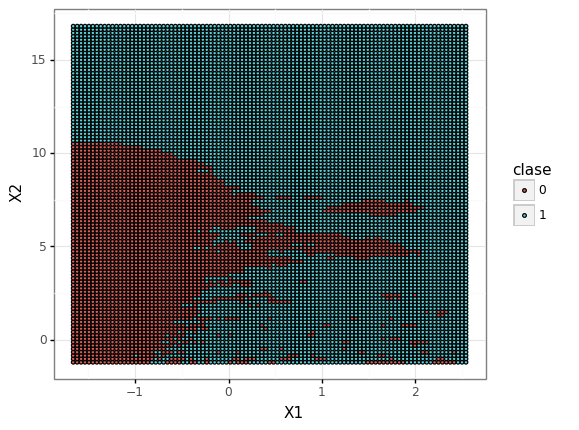

<ggplot: (8743656894073)>

In [43]:
(
ggplot(regiones_10, aes(
x = "x1",
y = "x2",
fill = "clase")) +
geom_point(size = 1) +
ylab("X2") +
xlab("X1") +
theme_bw() +
theme(legend_position = "right",
subplots_adjust={'right': 0.8})
)

Se observa que existe una zona en la esquina inferior derecha donde la clase predicha
sería 0 y el resto, con pequeñas excepciones serían regiones donde se prediciría la clase
1.

## ¿Qué sucede si utilizamos K = 1? ¿Y si utilizamos K = 100?

Se comprueba que regiones se obtendrían cambiando la K a K = 1 y K = 100.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
# crear modelo con K = 10----------------------------------------
model_KNN_1 = KNeighborsClassifier(n_neighbors = 1)
# utilizamos un modelo donde usamos todos los puntos-------------
model_KNN_1.fit(predictores_prepared, y)
# tipos----------------------------------------------------------

KNeighborsClassifier(n_neighbors=1)

In [45]:
pred_1 = model_KNN_1.predict(x_grid)
regiones_1 = x_grid.copy()
# pegar los tipos predichos a la rejilla-------------------------
regiones_1["clase"] = pred_1
regiones_1["clase"] = regiones_1["clase"].astype(object)
print(regiones_1["clase"].value_counts())
# pintar la rejilla----------------------------------------------

1    6592
0    3609
Name: clase, dtype: int64


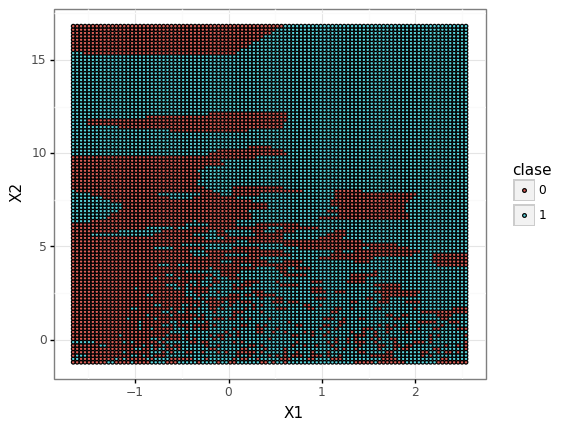

<ggplot: (8743656852986)>

In [46]:
(
ggplot(regiones_1, aes(
x = "x1",
y = "x2",
fill = "clase")) +
geom_point(size = 1) +
ylab("X2") +
xlab("X1") +
theme_bw() +
theme(legend_position = "right",
subplots_adjust={'right': 0.8})
)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
# crear modelo con K = 10----------------------------------------
model_KNN_100 = KNeighborsClassifier(n_neighbors = 100)
# utilizamos un modelo donde usamos todos los puntos-------------
model_KNN_100.fit(predictores_prepared, y)
# tipos----------------------------------------------------------

KNeighborsClassifier(n_neighbors=100)

In [48]:
pred_100 = model_KNN_100.predict(x_grid)
regiones_100 = x_grid.copy()
# pegar los tipos predichos a la rejilla-------------------------
regiones_100["clase"] = pred_100
regiones_100["clase"] = regiones_100["clase"].astype(object)
print(regiones_100["clase"].value_counts())
# pintar la rejilla----------------------------------------------

1    7573
0    2628
Name: clase, dtype: int64


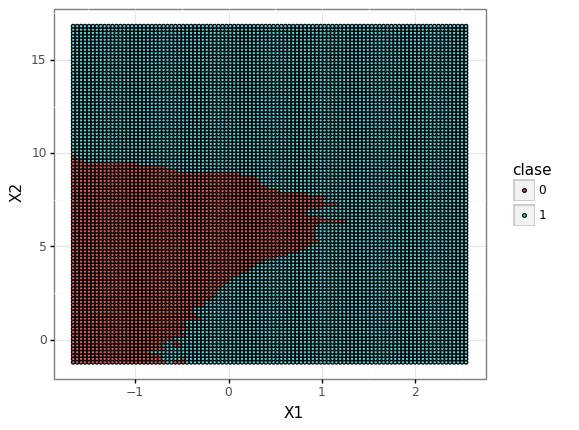

<ggplot: (8743656868783)>

In [49]:
(
ggplot(regiones_100, aes(
x = "x1",
y = "x2",
fill = "clase")) +
geom_point(size = 1) +
ylab("X2") +
xlab("X1") +
theme_bw() +
theme(legend_position = "right",
subplots_adjust={'right': 0.8})
)

Se observa que cuando la K es baja se permite mucha flexibilidad en las regiones,
pudiendo aparecer muchas regiones pequeñas. En cambio, cuando K es grande, las
regiones están más definidas.

## ¿Cuál sería el valor de K óptimo?

Para escoger el valor de K óptimo emplearemos VC. Se entrenará al modelo para un
número de observaciones y se comprobará con el resto cuál es la que minimiza el error.
Para ellos se utilizará la función cross_val_score del módulo sklearn.cross_validation
que permite obtener estas puntuaciones a partir del modelo. En este ejemplo, se va a
coger como medida de validación cruzada el accuracy, que determina la proporción de
casos bien clasificados sobre el total del modelo

In [52]:
# Encontrar el valor optimo de K
from sklearn.model_selection import cross_val_score
# valores de K que vamos a probar--------------------------------
k_range = range(1, 100)
# inicializar vector de puntuaciones-----------------------------
k_scores = []
# bucle
for k in k_range:
    # ajustar el modelo con k vecinos
    knn = KNeighborsClassifier(n_neighbors=k)
    # obtener puntuaciones de VC
    scores = cross_val_score(knn, predictores_prepared, y,
    cv = 10, scoring = "accuracy")
    # Guardar puntuaciones en el vector
    k_scores.append(scores.mean())

En la Figura 11 se muestra como varía el accuracy con K. Se observa que a partir de 50,
la accuracy es prácticamente la misma. El máximo global (obtenido con la función
np.argmax()**) se encuentra en K = 94.

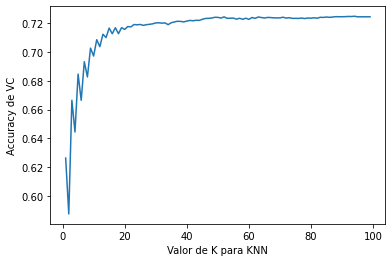

In [53]:
# print(k_scores)
# pintar valores-------------------------------------------------
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Accuracy de VC')
plt.show()

In [54]:
print("El valor de K que maximiza la accuracy es",
np.argmax(k_scores) + 1)

El valor de K que maximiza la accuracy es 94
